In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from iexfinance.stocks import Stock, get_historical_data
from iexfinance.refdata import get_symbols
import os
from pandas.plotting import register_matplotlib_converters
%matplotlib inline

In [2]:
register_matplotlib_converters()
key = os.getenv('IEX_TOKEN')
plt.rcParams['figure.figsize'] = [20, 20]

In [3]:
class Signals():
    def __init__(self, symbol, start, end):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.data = get_historical_data(self.symbol, self.start, self.end, output_format='pandas')
        self.data['avg'] = (self.data['close'] + self.data['low'] + self.data['high']) / 3
    
    def all_indicators(self, ndays_ema_short=12, ndays_ema_long=26, macd_ndays=9, cci_ndays=20):        
        # Exponential Moving Average
        ema_short = self.data['avg'].ewm(span=ndays_ema_short).mean()
        ema_long = self.data['avg'].ewm(span=ndays_ema_long).mean()
        
        plt.subplot(311)
        plt.plot(self.data['avg'], label=self.symbol, color='green')
        plt.plot(ema_short, label='EMA {0} days'.format(ndays_ema_short), color='blue')
        plt.plot(ema_long, label='EMA {0} days'.format(ndays_ema_long), color='red')
        plt.legend()
        
        # Moving Average Convergence Divergence
        macd = ema_short - ema_long
        signal_line_macd = macd.ewm(span=macd_ndays).mean()
        
        plt.subplot(312)
        plt.plot(macd, label=self.symbol + ' macd', color='blue')
        plt.plot(signal_line_macd, label='signal line', color='green')
        plt.legend()
        
        # Commodity Channel Index
        sma = self.data['avg'].rolling(window=cci_ndays).mean()
        std = self.data['avg'].rolling(window=cci_ndays).std()
        cci = (self.data['avg'] - sma) / (0.015 * std)
        
        plt.subplot(313)
        plt.plot(self.data['avg'].index, [100]*len(self.data['close'].index), label='overpriced', linestyle=':', color='red')
        plt.plot(self.data['avg'].index, [-100]*len(self.data['close'].index), label='underpriced', linestyle=':', color='blue')
        plt.plot(self.data['close'].index, [0]*len(self.data['close'].index), label='threshold', linestyle=':', color='blue')
        plt.plot(cci, label='cci', color='magenta')   
        plt.legend()
        
        plt.show()

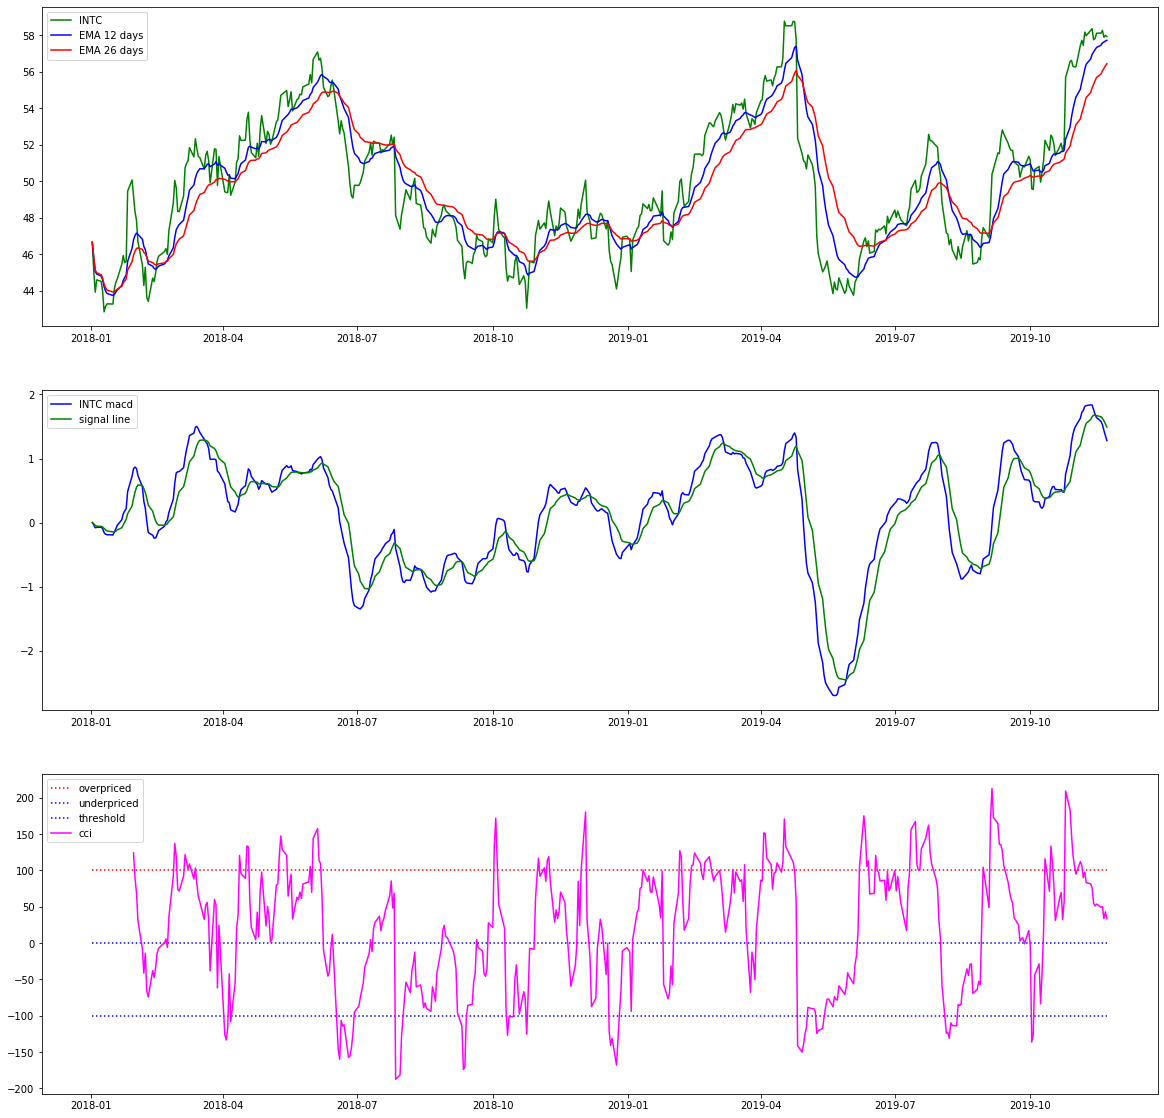

In [4]:
g = Signals('INTC', start=datetime(2018, 1, 1), end=datetime(2019,11,25))
g.all_indicators()